In [1]:
!pip install pandas
!pip install numpy
!pip install surprise
!pip install matplotlib
!pip install scikit-learn
!pip install nltk
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357260 sha256=9294b7efb8528f3854d8d2431133141b4734b43ec701b4da18f457286a63f54e
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [6]:
import pandas as pd

dataset = pd.read_csv("/content/IMDB Dataset.csv")
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [7]:
dataset.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
dataset['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [9]:
dataset['review_length'] = dataset['review'].apply(len)
dataset

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642
49997,I am a Catholic taught in parochial elementary...,negative,1280
49998,I'm going to have to disagree with the previou...,negative,1234


In [10]:
dataset['review_length'].describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64

In [11]:
print(dataset[dataset['sentiment'] == 'positive']['review'].sample(5))
print(dataset[dataset['sentiment'] == 'negative']['review'].sample(5))



39928    I watch romantic comedies with some hesitation...
23716    When Northfork debuted at the Cannes Film Fest...
12608    I have seen this film at least 100 times and I...
22227    I just wanna say that amongst all the so-calle...
31393    This is one of the best films I've seen from t...
Name: review, dtype: object
149      The buzz for this film has always been about t...
36862    Im sorry to myself, you know why. I feel paine...
2498     This film breeches the fine line between satir...
42820    This film really misses the mark on most front...
5323     I wanted to watch this movie because of Eliza ...
Name: review, dtype: object


In [12]:
dataset.duplicated().sum()

418

In [13]:
dataset[dataset.duplicated()]

,review,sentiment,review_length
3537,Quite what the producers of this appalling ada...,negative,2308
3769,My favourite police series of all time turns t...,positive,488
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive,696
6352,If you liked the Grinch movie... go watch that...,negative,548
6479,I want very much to believe that the above quo...,negative,2750
...,...,...,...
49912,This is an incredible piece of drama and power...,positive,918
49950,This was a very brief episode that appeared in...,negative,1075
49984,Hello it is I Derrick Cannon and I welcome you...,negative,2232
49986,This movie is a disgrace to the Major League F...,negative,641


In [14]:
dataset[dataset['review_length'] == 2308]

,review,sentiment,review_length
2013,Quite what the producers of this appalling ada...,negative,2308
3537,Quite what the producers of this appalling ada...,negative,2308
4456,When I was over at Hollywood video I looked th...,positive,2308
10083,Campfire Tales (1997)<br /><br />An excellent ...,positive,2308
20064,"When ""Deranged"" was made the film-makers saw f...",negative,2308
23514,How could anyone who liked the previous JP mov...,negative,2308
32459,"*Warning - no plot spoilers ahead, but movie s...",negative,2308
38202,Why aren't more films (especially American) mo...,positive,2308
44066,"Drifting around on bootlegs, sometimes thought...",negative,2308


In [15]:
dataset = dataset.drop_duplicates().copy()
dataset

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642
49997,I am a Catholic taught in parochial elementary...,negative,1280
49998,I'm going to have to disagree with the previou...,negative,1234


In [16]:
dataset['word_count'] = dataset['review'].apply(lambda x: len(x.split()))
dataset

,review,sentiment,review_length,word_count
0,One of the other reviewers has mentioned that ...,positive,1761,307
1,A wonderful little production. <br /><br />The...,positive,998,162
2,I thought this was a wonderful way to spend ti...,positive,926,166
3,Basically there's a family where a little boy ...,negative,748,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,112
49997,I am a Catholic taught in parochial elementary...,negative,1280,230
49998,I'm going to have to disagree with the previou...,negative,1234,212


In [17]:
dataset['word_count'].describe()

count    49582.000000
mean       231.350167
std        171.542020
min          4.000000
25%        126.000000
50%        173.000000
75%        281.000000
max       2470.000000
Name: word_count, dtype: float64

In [18]:
dataset.nlargest(6, 'word_count')

,review,sentiment,review_length,word_count
31481,Match 1: Tag Team Table Match Bubba Ray and Sp...,positive,13704,2470
40521,There's a sign on The Lost Highway that says:<...,positive,12988,2278
31436,"Back in the mid/late 80s, an OAV anime by titl...",positive,12129,2125
31240,"(Some spoilers included:)<br /><br />Although,...",positive,12930,2108
12647,Titanic directed by James Cameron presents a f...,positive,10321,1839
5708,**Attention Spoilers**<br /><br />First of all...,positive,10363,1830


In [19]:
dataset[dataset['word_count']==2470]['review'].iloc[0]

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

In [20]:
dataset = dataset.drop(dataset[dataset['word_count'] == 2470].index)
dataset.nlargest(6, 'word_count')

,review,sentiment,review_length,word_count
40521,There's a sign on The Lost Highway that says:<...,positive,12988,2278
31436,"Back in the mid/late 80s, an OAV anime by titl...",positive,12129,2125
31240,"(Some spoilers included:)<br /><br />Although,...",positive,12930,2108
12647,Titanic directed by James Cameron presents a f...,positive,10321,1839
5708,**Attention Spoilers**<br /><br />First of all...,positive,10363,1830
3024,If anyone ever assembles a compendium on moder...,positive,9951,1737


In [21]:
import re
sample_text = dataset['review'].sample(1).values[0]
print(re.findall(r'\b\w+\b', sample_text))

['my', 'friend', 'bought', 'the', 'movie', 'for', '5', 'its', 'is', 'not', 'even', '1', 'cent', 'worth', 'because', 'they', 'wrote', 'it', 'was', 'like', 'American', 'pie', 'but', 'we', 'would', 'soon', 'find', 'out', 'that', 'there', 'is', 'a', 'long', 'way', 'from', 'American', 'pie', 'to', 'that', 'piece', 'of', 'crap', 'it', 'is', 'not', 'even', 'a', 'comedy', 'its', 'more', 'like', 'a', 'really', 'really', 'really', 'bad', 'documentary', 'not', 'only', 'the', 'story', 'is', 'bad', 'the', 'picture', 'and', 'sound', 'also', 'sucks', 'to', 'they', 'put', 'in', 'some', 'alcohol', 'chicks', 'dwarfs', 'and', 'drunken', 'teens', 'and', 'the', 'result', 'is', 'a', 'disaster', 'if', 'you', 'see', 'this', 'movie', 'don', 't', 'buy', 'it', 'rather', 'spend', 'your', 'money', 'on', 'something', 'else', 'and', 'better', 'if', 'you', 'are', 'gonna', 'torture', 'yourself', 'then', 'don', 't', 'invite', 'your', 'friend', 's', 'unless', 'you', 'hate', 'really', 'much', 'and', 'you', 'want', 'to', 

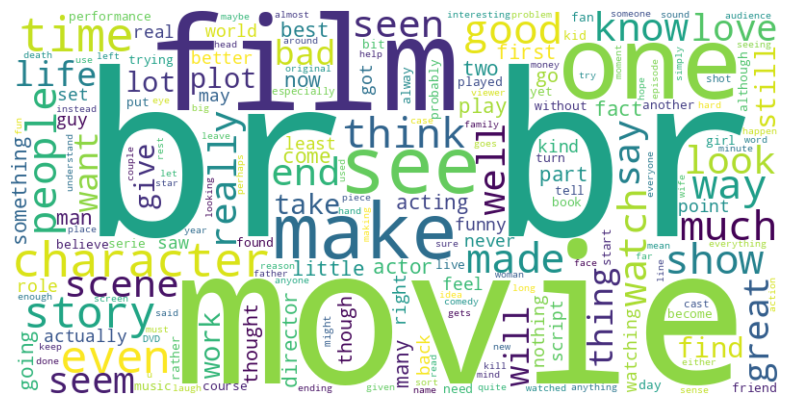

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(dataset['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


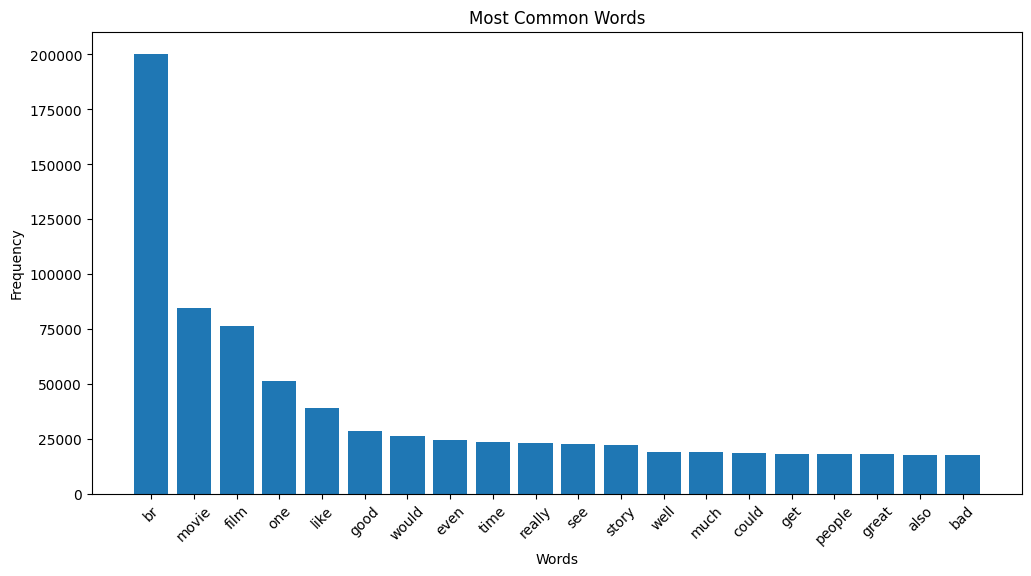

In [26]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Download the stopwords dataset
nltk.download('stopwords')
nltk.download('punkt')

# Define stop words
stop_words = set(stopwords.words('english'))

# Assuming df['review'] is a pandas DataFrame column with text reviews
words = word_tokenize(' '.join(dataset['review']).lower())

# Filter out stop words and non-alphabetic words
words = [word for word in words if word.isalpha() and word not in stop_words]

# Count word frequencies
word_freq = Counter(words)

# Get the 20 most common words
most_common_words = word_freq.most_common(20)

# Plot the most common words
plt.figure(figsize=(12, 6))
plt.bar(*zip(*most_common_words))
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words')
plt.show()

In [27]:
sample_text = dataset['review'].sample(1).values[0]
print(re.findall(r'[^\w\s]', sample_text))

['(', ')', '-', ',', ',', ',', '.', '<', '/', '>', '<', '/', '>', '.', ',', ',', ',', '.', '.', ',', ',', ',', ',', '.', '<', '/', '>', '<', '/', '>', '.', '.', ',', ',', ';', ',', ',', ',', '.', '.', '<', '/', '>', '<', '/', '>', '.', ',', '?', '?', '?', '-', ',', '.', ',', ',', '.', '.', '<', '/', '>', '<', '/', '>', ',', ',', '.', ',', '.', '.', ',', '.', '?', '<', '/', '>', '<', '/', '>', '.', ',', ',', '-', '.', ',', '.', '<', '/', '>', '<', '/', '>', ',', '-', '.', '.', ':', ',', '.', '"', '"', ',', ',', '.']


In [28]:
!pip install beautifulsoup4

In [29]:
from bs4 import BeautifulSoup

dataset['clean_review'] = dataset['review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())
dataset['clean_review'] = dataset['clean_review'].str.lower()

dataset

<ipython-input-29-8c5c0af51d01>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  dataset['clean_review'] = dataset['review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())


,review,sentiment,review_length,word_count,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,307,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,998,162,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,positive,926,166,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,748,138,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,"petter mattei's ""love in the time of money"" is..."
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,194,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,112,"bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...,negative,1280,230,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,1234,212,i'm going to have to disagree with the previou...


In [30]:
from nltk.tokenize import word_tokenize

dataset['clean_review'] = dataset['clean_review'].apply(word_tokenize)
dataset

,review,sentiment,review_length,word_count,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,307,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,998,162,"[a, wonderful, little, production, ., the, fil..."
2,I thought this was a wonderful way to spend ti...,positive,926,166,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,748,138,"[basically, there, 's, a, family, where, a, li..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,"[petter, mattei, 's, ``, love, in, the, time, ..."
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,194,"[i, thought, this, movie, did, a, down, right,..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,112,"[bad, plot, ,, bad, dialogue, ,, bad, acting, ..."
49997,I am a Catholic taught in parochial elementary...,negative,1280,230,"[i, am, a, catholic, taught, in, parochial, el..."
49998,I'm going to have to disagree with the previou...,negative,1234,212,"[i, 'm, going, to, have, to, disagree, with, t..."


In [31]:
def handle_negations(tokens):
    negation_words = {"not", "no", "never", "n't"}
    negated_tokens = []
    negation = False
    for token in tokens:
        if token in negation_words:
            negation = True
        elif negation:
            negated_tokens.append("not_" + token)
            negation = False
        else:
            negated_tokens.append(token)
    return negated_tokens

dataset['clean_review'] = dataset['clean_review'].apply(handle_negations)
dataset

,review,sentiment,review_length,word_count,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,307,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,998,162,"[a, wonderful, little, production, ., the, fil..."
2,I thought this was a wonderful way to spend ti...,positive,926,166,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,748,138,"[basically, there, 's, a, family, where, a, li..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,"[petter, mattei, 's, ``, love, in, the, time, ..."
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,194,"[i, thought, this, movie, did, a, down, right,..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,112,"[bad, plot, ,, bad, dialogue, ,, bad, acting, ..."
49997,I am a Catholic taught in parochial elementary...,negative,1280,230,"[i, am, a, catholic, taught, in, parochial, el..."
49998,I'm going to have to disagree with the previou...,negative,1234,212,"[i, 'm, going, to, have, to, disagree, with, t..."


In [32]:
import re

dataset['clean_review'] = dataset['clean_review'].apply(lambda x: [re.sub(r'[^a-zA-Z\s]', '', word) for word in x])
dataset

,review,sentiment,review_length,word_count,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,307,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,998,162,"[a, wonderful, little, production, , the, film..."
2,I thought this was a wonderful way to spend ti...,positive,926,166,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,748,138,"[basically, there, s, a, family, where, a, lit..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,"[petter, mattei, s, , love, in, the, time, of,..."
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,194,"[i, thought, this, movie, did, a, down, right,..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,112,"[bad, plot, , bad, dialogue, , bad, acting, , ..."
49997,I am a Catholic taught in parochial elementary...,negative,1280,230,"[i, am, a, catholic, taught, in, parochial, el..."
49998,I'm going to have to disagree with the previou...,negative,1234,212,"[i, m, going, to, have, to, disagree, with, th..."


In [33]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
dataset['clean_review'] = dataset['clean_review'].apply(lambda x: [word for word in x if word not in stop_words])

In [34]:
from nltk.stem import PorterStemmer

# Using stemming
stemmer = PorterStemmer()
dataset['clean_review'] = dataset['clean_review'].apply(lambda x: [stemmer.stem(word) for word in x])

dataset

,review,sentiment,review_length,word_count,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,307,"[one, review, mention, watch, , oz, episod, ho..."
1,A wonderful little production. <br /><br />The...,positive,998,162,"[wonder, littl, product, , film, techniqu, una..."
2,I thought this was a wonderful way to spend ti...,positive,926,166,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,748,138,"[basic, famili, littl, boy, , jake, , think, z..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,"[petter, mattei, , love, time, money, , visual..."
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,194,"[thought, movi, right, good, job, , nota, crea..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,112,"[bad, plot, , bad, dialogu, , bad, act, , idio..."
49997,I am a Catholic taught in parochial elementary...,negative,1280,230,"[cathol, taught, parochi, elementari, school, ..."
49998,I'm going to have to disagree with the previou...,negative,1234,212,"[go, disagre, previou, comment, side, maltin, ..."


In [35]:
dataset['clean_review'] = dataset['clean_review'].apply(lambda x: ' '.join(x))
dataset

,review,sentiment,review_length,word_count,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,307,one review mention watch oz episod hook righ...
1,A wonderful little production. <br /><br />The...,positive,998,162,wonder littl product film techniqu unassum ol...
2,I thought this was a wonderful way to spend ti...,positive,926,166,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,748,138,basic famili littl boy jake think zombi clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,petter mattei love time money visual stun fi...
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,194,thought movi right good job nota creativ orig...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,112,bad plot bad dialogu bad act idiot direct ...
49997,I am a Catholic taught in parochial elementary...,negative,1280,230,cathol taught parochi elementari school nun t...
49998,I'm going to have to disagree with the previou...,negative,1234,212,go disagre previou comment side maltin one se...


In [36]:
dataset['sentiment'] = dataset['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['clean_review'], dataset['sentiment'], test_size=0.2, random_state=42)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords.words('english'))),
    ('clf', LogisticRegression(max_iter=1000))
])

# Training the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('clf', LogisticRegression(max_iter=1000))])

In [38]:
predictions = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))

Accuracy: 0.8940203690632248
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4982
           1       0.88      0.91      0.90      4935

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



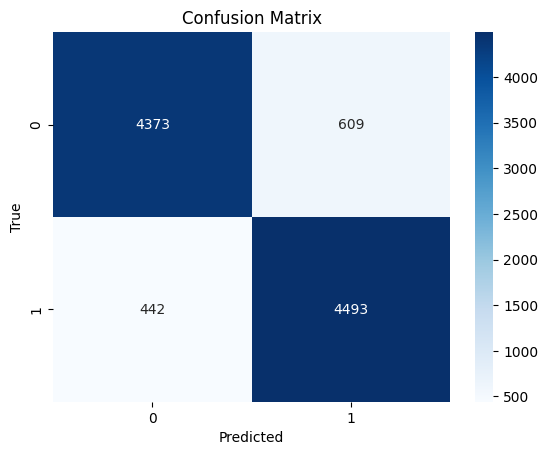

In [39]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [40]:
import pickle
with open('sentiment_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

print("Model saved successfully.")

Model saved successfully.


In [42]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the saved pipeline
with open('/content/sentiment_pipeline.pkl', 'rb') as file:
    saved_pipeline = pickle.load(file)

In [43]:
def preprocess_new_input(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = handle_negations(tokens)
    tokens = [re.sub(r'[^a-zA-Z\s]', '', word) for word in tokens]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Function to classify new input
def classify_new_input(text):
    processed_text = preprocess_new_input(text)
    prediction = saved_pipeline.predict([processed_text])
    sentiment_label = 'positive' if prediction[0] == 1 else 'negative'
    return sentiment_label

In [44]:
new_input = "This product is awesome!"
print(f"Sentiment: {classify_new_input(new_input)}")

Sentiment: positive
